In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


PID_df_all_noproton_shuffled = pd.read_pickle("PID_df_all_noproton_shuffled.pkl")

training_PID_df_all_noproton_shuffled = pd.read_pickle("training_PID_df_all_noproton_shuffled.pkl")

PID_df_all_shuffled = pd.read_pickle("PID_df_all_shuffled.pkl")

new_df_jpsipr = pd.read_pickle("new_df_jpsipr.pkl")


2025-10-31 09:39:17.596561: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Proton processes only

PID_df_protons_noanom_shuffled = pd.read_pickle("PID_df_protons_noanom_shuffled.pkl")

PID_df_protons_shuffled = pd.read_pickle("PID_df_protons_shuffled.pkl")

training_PID_only_noproton_shuffled = pd.read_pickle("training_PID_only_noproton_shuffled.pkl")


In [3]:
training_PID_only_noproton_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
28665,28665,3.089679,2,1.891988,1.641038,1.724243,1.911601,0.461440,1.791093,1.989246,...,10,10,10,10,10,10,10,10,10,10
16791,16791,3.072391,2,2.134704,0.803666,0.872489,1.017954,0.198560,2.109828,0.889523,...,10,10,10,10,10,10,10,10,10,10
1558,1558,2.340067,2,1.040042,4.561634,4.606635,3.148992,0.067210,0.848705,5.220335,...,10,10,10,10,10,10,10,10,10,10
4578,4578,1.958130,2,7.013365,29.086222,26.894277,7.284274,0.224484,7.210286,29.703240,...,10,10,10,10,10,10,10,10,10,10
7770,7770,2.732979,2,1.616578,2.597115,2.680161,2.498808,0.445978,1.526188,2.909362,...,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26936,26936,2.287341,2,0.551831,6.225948,6.258061,4.169843,0.443831,1.001848,4.679361,...,10,10,10,10,10,10,10,10,10,10
22931,22931,2.993944,2,1.885800,1.664229,1.745105,1.859886,0.331841,1.953394,1.430862,...,10,10,10,10,10,10,10,10,10,10
8806,8806,2.116056,2,0.589163,9.962892,9.816078,4.873026,0.149921,0.311743,9.022512,...,10,10,10,10,10,10,10,10,10,10
21230,21230,1.946524,2,7.682345,30.497266,27.809754,6.697930,0.044930,8.507816,33.032397,...,10,10,10,10,10,10,10,10,10,10


In [4]:
training_PID_df_all_noproton_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
12095,12095,2.268966,2,0.860399,5.159008,5.179373,3.214035,0.087744,0.734785,5.590383,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
26626,26626,3.147983,2,2.441247,0.262840,0.205688,0.085547,0.589374,2.257959,0.368022,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
10869,10869,3.669294,2,2.387027,0.083472,0.020690,0.370292,0.206491,2.422716,0.206038,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
13655,13655,0.797295,2,2.321374,0.019146,0.081435,1.725572,2.728052,2.342198,0.049842,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
13939,13939,3.192802,2,2.385423,0.071323,0.010353,0.307685,0.396092,2.392241,0.094786,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,250,0.485466,2,2.224362,0.113375,0.465057,2.568646,3.092533,2.114304,0.206183,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
5851,5851,3.730668,4,2.223274,0.479693,0.553161,1.004391,0.314113,2.237471,0.440619,...,1.977156,0.175757,0.382447,2.721952,3.148485,2.497243,0.447228,0.399765,0.313254,1.176661
26804,26804,0.594397,2,2.144323,0.383217,0.126484,2.131554,2.931827,2.288285,0.066773,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
12346,12346,0.536447,2,2.163170,0.206747,0.104316,2.351229,3.015615,2.210335,0.064058,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
PID_df_all_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
149107,149107,0.427867,2,2.018281,0.227498,0.274363,2.643780,3.122288,2.059559,0.115726,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1095764,1095764,1.849618,2,2.245934,0.422602,0.470042,0.241815,1.118551,2.465537,0.335921,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1858757,1858757,0.299764,2,1.292441,0.317603,0.632291,2.946649,3.221035,1.367474,0.183376,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1803095,1803095,2.094586,2,2.376402,0.027879,0.020805,0.024186,1.131945,2.443174,0.258524,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
432124,432124,0.418237,2,2.218636,0.360829,0.798511,2.778909,3.164411,2.103713,0.054371,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002413,1002413,0.272564,2,1.068931,0.132681,1.089246,3.045648,3.250479,0.917861,0.080851,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2126320,2126320,0.655151,2,2.358433,0.211582,0.379871,2.174022,2.932213,2.281076,0.036126,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1626036,1626036,0.493215,2,2.268890,0.220228,0.549036,2.575284,3.093666,2.205876,0.035935,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2016889,2016889,1.024346,2,2.500103,0.504406,0.531478,1.548127,2.565687,2.375360,0.080890,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [6]:
X_PID = training_PID_df_all_noproton_shuffled[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
# # Extract mass separately
# mass = df['mass'].values
mass_PID = training_PID_df_all_noproton_shuffled['InvariantMass'].values
# # Create a train/test split
X_PID_train, X_PID_test, mass_PID_train, mass_PID_test = train_test_split(X_PID, mass_PID, test_size=0.05, random_state=42)

from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform training data, transform test data
X_PID_train = scaler.fit_transform(X_PID_train)
X_PID_test = scaler.transform(X_PID_test)

print(X_PID_train.shape, X_PID_test.shape)

(171000, 21) (9000, 21)


In [7]:
# #Protons only

# X_PID = training_PID_only_noproton_shuffled[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
# # # Extract mass separately
# # mass = df['mass'].values
# mass_PID = training_PID_only_noproton_shuffled['InvariantMass'].values
# # # Create a train/test split
# X_PID_train, X_PID_test, mass_PID_train, mass_PID_test = train_test_split(X_PID, mass_PID, test_size=0.05, random_state=42)

# from sklearn.preprocessing import MinMaxScaler

# # Initialize scaler
# scaler = MinMaxScaler()

# # Fit and transform training data, transform test data
# X_PID_train = scaler.fit_transform(X_PID_train)
# X_PID_test = scaler.transform(X_PID_test)

# print(X_PID_train.shape, X_PID_test.shape)

In [8]:
print(X_PID_train.shape[0])

171000


In [9]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Available devices:", tf.config.list_physical_devices())
# tf.debugging.set_log_device_placement(True)

TensorFlow version: 2.16.2
Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [10]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU (if any)


In [11]:
# #------------------------------------------
# # 2. Define the Autoencoder Model
# #------------------------------------------

input_dim = X_PID_train.shape[1]  # should be 6
encoding_dim = 11             # latent space dimension

# # Input layer
input_layer = Input(shape=(input_dim,))

# # Encoding layer (compression)
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# # Decoding layer (reconstruction)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# # Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
# autoencoder.compile(optimizer='adam', loss='mse')
from tensorflow.keras.optimizers import Adam
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
# autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse') # best, 185 epochs automatic stop

#------------------------------------------
# 3. Train the Autoencoder
#------------------------------------------

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=2,
    restore_best_weights=True
)

history = autoencoder.fit(X_PID_train, X_PID_train, 
                          epochs=500,
                          # epochs=500,
                          batch_size=256,
                        #   batch_size=64,
                          shuffle=True,
                          validation_data=(X_PID_test, X_PID_test),
                          verbose=2,
                          callbacks=[early_stopping]
                         )

# with tf.device('/CPU:0'):
#     history = autoencoder.fit(X_train, X_train,
#                               epochs=500,
#                               batch_size=64,
#                               validation_data=(X_test, X_test),
#                               callbacks=[early_stopping],
#                               verbose=2)
#     print(f"Training stopped at epoch {len(history.history['loss'])}")

print(f"Training stopped at epoch {len(history.history['loss'])}")


Epoch 1/500
668/668 - 2s - 2ms/step - loss: 0.0070 - val_loss: 5.2784e-04
Epoch 2/500
668/668 - 1s - 1ms/step - loss: 4.3885e-04 - val_loss: 3.3308e-04
Epoch 3/500
668/668 - 1s - 2ms/step - loss: 3.1496e-04 - val_loss: 2.8980e-04
Epoch 4/500
668/668 - 2s - 2ms/step - loss: 2.7741e-04 - val_loss: 2.5197e-04
Epoch 5/500
668/668 - 1s - 1ms/step - loss: 2.3777e-04 - val_loss: 2.0967e-04
Epoch 6/500
668/668 - 1s - 2ms/step - loss: 2.0444e-04 - val_loss: 1.9057e-04
Epoch 7/500
668/668 - 1s - 2ms/step - loss: 1.8502e-04 - val_loss: 1.7559e-04
Epoch 8/500
668/668 - 1s - 2ms/step - loss: 1.7255e-04 - val_loss: 1.6347e-04
Epoch 9/500
668/668 - 2s - 2ms/step - loss: 1.6236e-04 - val_loss: 1.6122e-04
Epoch 10/500
668/668 - 3s - 4ms/step - loss: 1.5360e-04 - val_loss: 1.4846e-04
Epoch 11/500
668/668 - 2s - 3ms/step - loss: 1.4656e-04 - val_loss: 1.4153e-04
Epoch 12/500
668/668 - 2s - 2ms/step - loss: 1.4041e-04 - val_loss: 1.3796e-04
Epoch 13/500
668/668 - 2s - 2ms/step - loss: 1.3769e-04 - val_los

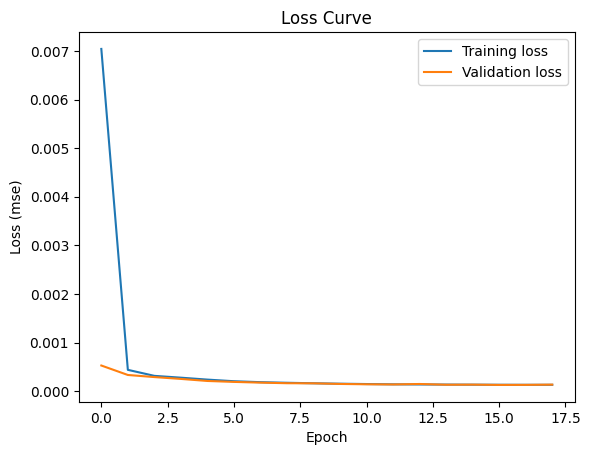

In [12]:
# Optional: Plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (mse)')
plt.title('Loss Curve')
plt.legend()
#plt.savefig("final_loss2.pdf")
plt.show()

In [13]:
# #------------------------------------------
# # 4. Use the Autoencoder for Anomaly Detection
# #------------------------------------------

# # Compute reconstruction on the test set
X_PID_test_pred = autoencoder.predict(X_PID_test)
# # Calculate MSE per sample
mse = np.mean(np.power(X_PID_test - X_PID_test_pred, 2), axis=1)
#plot

# You need to define a threshold for what you consider "anomalous"
# This could be determined by analyzing the MSE distribution on training data, for example.
threshold = 0.01 #np.mean(mse) + 3*np.std(mse)  # Example heuristic

# Find anomalous events
anomalous_indices = np.where(mse > threshold)[0]

#------------------------------------------
# 5. Retrieve the Mass for Anomalous Events
#------------------------------------------

# For any anomalous event, we can now look up its mass
if len(anomalous_indices) > 0:
    print("Anomalous Event Indices:", anomalous_indices)
    print("Mass values for anomalous events:", mass_PID_test[anomalous_indices])
else:
    print("No anomalies detected under this threshold.")


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
No anomalies detected under this threshold.


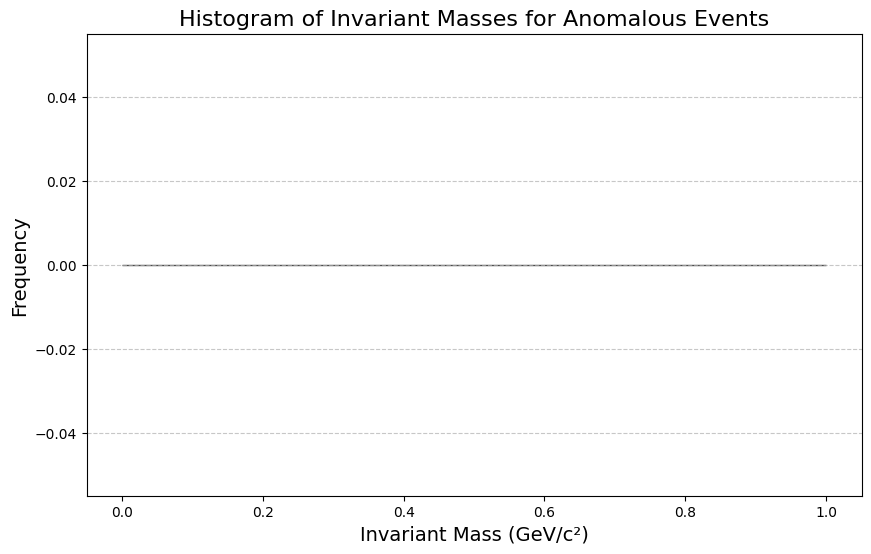

In [14]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(mass_PID_test[anomalous_indices], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Invariant Masses for Anomalous Events', fontsize=16)
plt.xlabel('Invariant Mass (GeV/c²)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()

In [15]:
mse_threshold = 0.01
mass_cutoff = 0

df_mass_cut_noexotica = PID_df_all_noproton_shuffled[PID_df_all_noproton_shuffled['InvariantMass'] > mass_cutoff]
X_alice_noexotica = df_mass_cut_noexotica[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
X_alice_noexotica = scaler.transform(X_alice_noexotica)

X_alice_noexotica_pred = autoencoder.predict(X_alice_noexotica)
mse_alice_noexotica = np.mean(np.power(X_alice_noexotica - X_alice_noexotica_pred, 2), axis=1)

df_high_mse_noexotica = df_mass_cut_noexotica[mse_alice_noexotica > mse_threshold]
alice_noexotica_masses = df_high_mse_noexotica['InvariantMass'].values

# ALICE, with exotica
df_mass_cut_exotica = PID_df_all_shuffled[PID_df_all_shuffled['InvariantMass'] > mass_cutoff]
X_alice_exotica = df_mass_cut_exotica[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
X_alice_exotica = scaler.transform(X_alice_exotica)

X_alice_exotica_pred = autoencoder.predict(X_alice_exotica)
mse_alice_exotica = np.mean(np.power(X_alice_exotica - X_alice_exotica_pred, 2), axis=1)

df_high_mse_exotica = df_mass_cut_exotica[mse_alice_exotica > mse_threshold]
alice_exotica_masses = df_high_mse_exotica['InvariantMass'].values

72103/72103 ━━━━━━━━━━━━━━━━━━━━ 207s 3ms/step
72179/72179 ━━━━━━━━━━━━━━━━━━━━ 136s 2ms/step


In [16]:
# #Protons only

# mse_threshold = 0.01
# mass_cutoff = 0

# df_mass_cut_noexotica = PID_df_protons_noanom_shuffled[PID_df_protons_noanom_shuffled['InvariantMass'] > mass_cutoff]
# X_alice_noexotica = df_mass_cut_noexotica[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
# X_alice_noexotica = scaler.transform(X_alice_noexotica)

# X_alice_noexotica_pred = autoencoder.predict(X_alice_noexotica)
# mse_alice_noexotica = np.mean(np.power(X_alice_noexotica - X_alice_noexotica_pred, 2), axis=1)

# df_high_mse_noexotica = df_mass_cut_noexotica[mse_alice_noexotica > mse_threshold]
# alice_noexotica_masses = df_high_mse_noexotica['InvariantMass'].values

# # ALICE, with exotica
# df_mass_cut_exotica = PID_df_protons_shuffled[PID_df_protons_shuffled['InvariantMass'] > mass_cutoff]
# X_alice_exotica = df_mass_cut_exotica[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
# X_alice_exotica = scaler.transform(X_alice_exotica)

# X_alice_exotica_pred = autoencoder.predict(X_alice_exotica)
# mse_alice_exotica = np.mean(np.power(X_alice_exotica - X_alice_exotica_pred, 2), axis=1)

# df_high_mse_exotica = df_mass_cut_exotica[mse_alice_exotica > mse_threshold]
# alice_exotica_masses = df_high_mse_exotica['InvariantMass'].values

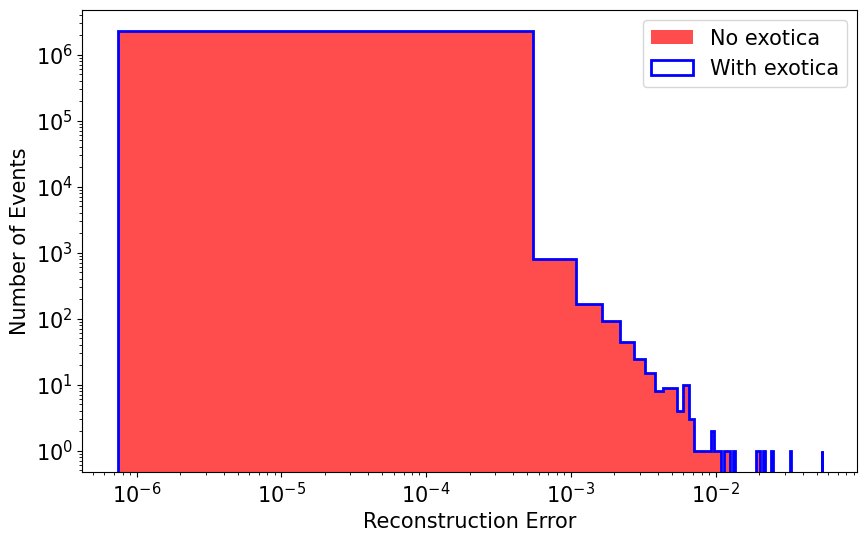

In [25]:
combined = np.concatenate([mse_alice_noexotica, mse_alice_exotica])

n_bins = 100

bin_edges = np.linspace(combined.min(), combined.max(), n_bins + 1)

plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 15})
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis

# Plot reconstruction error for normal events
plt.hist(mse_alice_noexotica, bins=bin_edges, alpha=0.7, label='No exotica', color='red')
plt.hist(mse_alice_exotica, bins=bin_edges, histtype='step', color='blue', linewidth=2, label='With exotica')

# plt.hist(mse_normal, bins=50, alpha=0.7, label='Normal Events (Label 1)', color='blue')

# Plot reconstruction error for anomalous events
#plt.hist(mse_anomalous, bins=50, alpha=0.7, label='Anomalous Events', color='red')
#plt.hist(mse_anomalous, bins=50, alpha=0.7, label='Anomalous Events (Label 0)', color='red')

# Add labels and title
plt.xlabel('Reconstruction Error')
plt.ylabel('Number of Events')
#plt.title('Reconstruction Error Distribution for ALICE cocktail, w/ and w/o exotica')
#plt.ylim(0.01,10**8)
#plt.xlim(0.01,100)
plt.legend()

#plt.savefig("final_error_proton_PID.pdf")

# Show the plot
plt.show()

/var/folders/tr/t57ln4fs7ngcr_h6w3njkb9h0000gn/T/ipykernel_4653/970554637.py:27: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


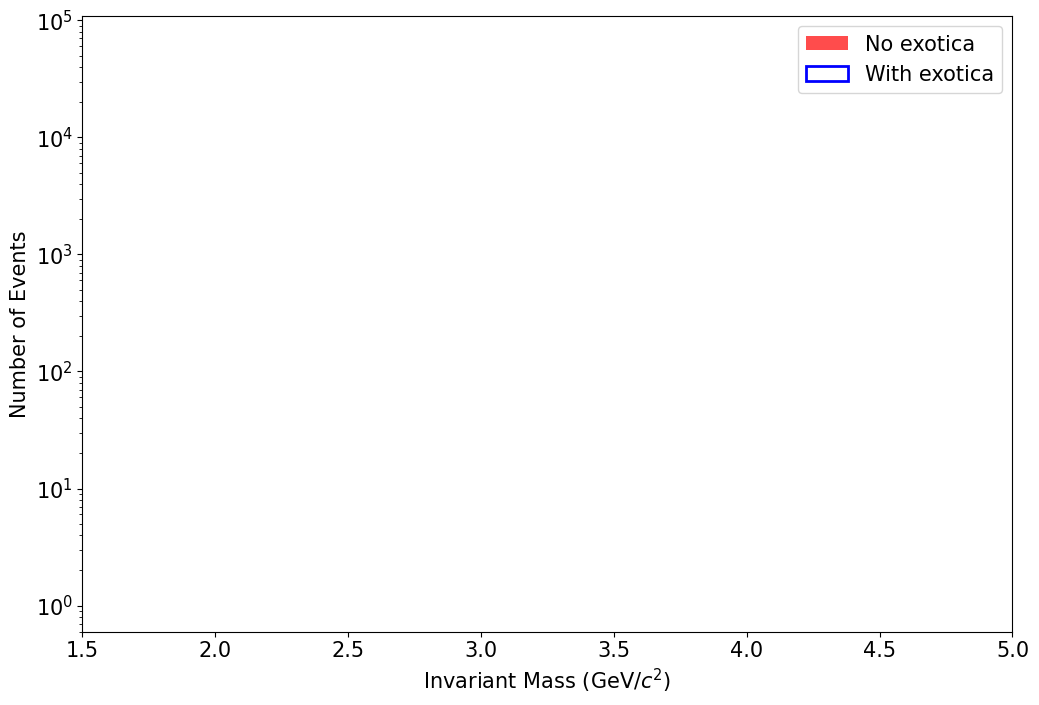

In [26]:
mse_threshold = 0.001

# alice_noexotica_high_mse = PID_df_all_noproton_shuffled[mse_alice_noexotica > mse_threshold]
# alice_noexotica_masses = alice_noexotica_high_mse['InvariantMass'].values

# # Filter cocktail with exotica with reconstruction error above the threshold
# alice_exotica_high_mse = PID_df_all_shuffled[mse_alice_exotica > mse_threshold]
# alice_exotica_masses = alice_exotica_high_mse['InvariantMass'].values

df_high_mse_noexotica = df_mass_cut_noexotica[mse_alice_noexotica > mse_threshold]
alice_noexotica_masses = df_high_mse_noexotica['InvariantMass'].values

df_high_mse_exotica = df_mass_cut_exotica[mse_alice_exotica > mse_threshold]
alice_exotica_masses = df_high_mse_exotica['InvariantMass'].values

# Plot the invariant mass distribution
plt.figure(figsize=(12, 8))

plt.hist(alice_noexotica_masses, bins=bin_edges, alpha=0.7, label='No exotica', color='red')
plt.hist(alice_exotica_masses, bins=bin_edges, histtype='step', color='blue', linewidth=2, label='With exotica')

# Add labels and title
plt.xlabel(r'Invariant Mass (GeV/$c^2$)')
plt.ylabel('Number of Events')
plt.xlim(1.5,5)
#plt.ylim(0.1,100)
plt.yscale('log')
#plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold}')
plt.ylim(0.6,110000)
plt.legend()
#plt.savefig("final_mass_proton_PID.pdf")
# Show the plot
plt.show()

In [19]:

proton_count_anom = np.sum((alice_exotica_masses >= 2.8) & (alice_exotica_masses <= 3.2))
print(proton_count_anom)

jpsi_count = np.sum((alice_noexotica_masses >= 2.8) & (alice_noexotica_masses <= 3.2))
print(jpsi_count)


0
0


In [20]:
df_jpsipro = new_df_jpsipr[new_df_jpsipr['InvariantMass'] > mass_cutoff]
X_jpsi_pro = df_jpsipro[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
X_jpsi_pro = scaler.transform(X_jpsi_pro)

X_jpsipro_pred = autoencoder.predict(X_jpsi_pro)
mse_jpsipro = np.mean(np.power(X_jpsi_pro - X_jpsipro_pred, 2), axis=1)

df_high_mse_jpsipro = df_jpsipro[mse_jpsipro > mse_threshold]
jpsipro_masses = df_high_mse_jpsipro['InvariantMass'].values


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


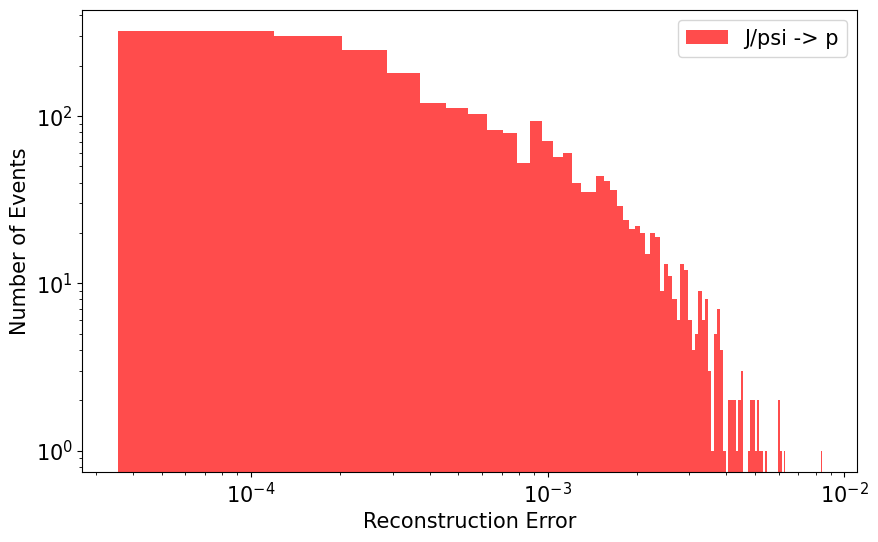

In [21]:


plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 15})
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.hist(mse_jpsipro, bins=100, alpha=0.7, label='J/psi -> p', color='red')


# Add labels and title
plt.xlabel('Reconstruction Error')
plt.ylabel('Number of Events')
#plt.title('Reconstruction Error Distribution for ALICE cocktail, w/ and w/o exotica')
#plt.ylim(0.01,10**8)
#plt.xlim(0.01,100)
plt.legend()

#plt.savefig("final_error_proton_PID.pdf")

# Show the plot
plt.show()

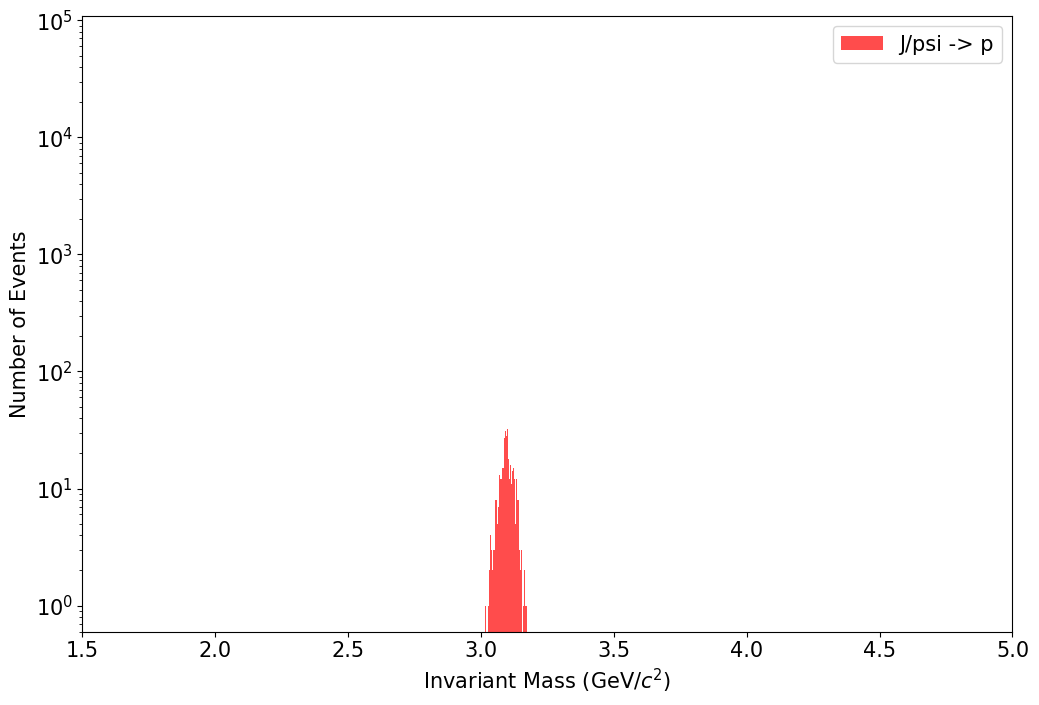

In [22]:
plt.figure(figsize=(12, 8))

plt.hist(jpsipro_masses, bins=100, alpha=0.7, label='J/psi -> p', color='red')

# Add labels and title
plt.xlabel(r'Invariant Mass (GeV/$c^2$)')
plt.ylabel('Number of Events')
plt.xlim(1.5,5)
#plt.ylim(0.1,100)
plt.yscale('log')
#plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold}')
plt.ylim(0.6,110000)
plt.legend()
#plt.savefig("final_mass_proton_PID.pdf")
# Show the plot
plt.show()